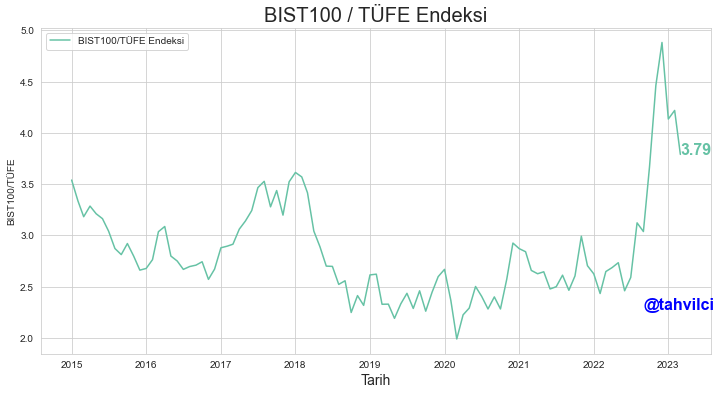

In [54]:
from evds import evdsAPI
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

def ratio(vars_dict, sd, ed):
    # Load data and format the date column
    df = evds.get_data(list(vars_dict.keys()), startdate=sd, enddate=ed)
    df['Tarih'] = pd.to_datetime(df['Tarih'], dayfirst=True)

    # Replace dots with underscores in the column names
    df.columns = df.columns.str.replace('.', '_')

    # Calculate the ratio of BIST100 to TÜFE Endeksi and add it as a new column
    df['BIST100/TÜFE'] = df['TP_MK_F_BILESIK'] / df['TP_FG_J0']
    df['BIST100/TÜFE'].iloc[-1] = df['BIST100/TÜFE'].iloc[-1].round(2)
    
    # Set the color palette for the line plot
    colors = sns.color_palette("Set2", 1)

    # Create a line plot for the ratio
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Tarih', y='BIST100/TÜFE', color=colors[0], label='BIST100/TÜFE Endeksi')

    # Add text annotations for the last value of the line
    plt.text(df['Tarih'].iloc[-1], df['BIST100/TÜFE'].iloc[-1], str(df['BIST100/TÜFE'].iloc[-1]), color=colors[0], fontsize=16, weight='bold')
    plt.text(df['Tarih'].iloc[-1] - pd.Timedelta(days=180), df['BIST100/TÜFE'].iloc[-1] * 0.6, '@tahvilci', color='blue', fontsize=16, weight='bold')
    # Add titles and labels
    plt.title('BIST100 / TÜFE Endeksi', fontsize=20)
    plt.xlabel('Tarih', fontsize=14)
    plt.show()

vars_dict={"TP.MK.F.BILESIK": "BIST100", "TP.FG.J0": "Enflasyon (TÜFE Endeksi)"}
sd="01-01-2015"
ed="31-03-2023"

ratio(vars_dict, sd, ed)